In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l9N0vcFSx8OeQBzZI80F")
project = rf.workspace("adam-fonagy").project("hunting-for-four-leaf-clovers")
version = project.version(20)
dataset = version.download("yolov8")


In [ ]:
!pip install ultralytics

from ultralytics import YOLO

# 2. Train the Model
# We use yolov8n.pt (Nano) because it's the fastest for a Flutter app
model = YOLO('yolov8n.pt')

model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=150,        # 1000 images need more time to converge
    imgsz=640,
    batch=16,          # Adjust based on your GPU memory
    patience=30,       # Stops if no improvement after 30 epochs (Early Stopping)
    mosaic=1.0,        # Combines 4 images into one (Critical for small objects)
    mixup=0.1,         # Blends two images (Prevents overfitting)
    cos_lr=True,       # Uses a cosine learning rate for smoother training
    save_period=10     # Saves a checkpoint every 10 epochs
)

In [ ]:
from google.colab import files
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Load your best model
model = YOLO('runs/detect/train/weights/best.pt')

# 2. Upload your test image
uploaded = files.upload()

for img_path in uploaded.keys():
    # 3. Run prediction with "The Cleaning Filters"
    results = model.predict(
        source=img_path,
        conf=0.6,      # High confidence: Ignore anything it's unsure about
        iou=0.4,       # NMS: If boxes overlap by 40%, merge them into one
        agnostic_nms=True,
        classes=[1]
    )

    # 4. Display results
    res_plotted = results[0].plot()
    plt.figure(figsize=(12,8))
    plt.imshow(res_plotted)
    plt.axis('off')
    plt.show()

In [ ]:
from ultralytics import YOLO

# 1. Load your best trained model
model = YOLO('runs/detect/train/weights/best.pt')

# 2. Export to TFLite
# format='tflite' -> The format for Flutter/Mobile
# imgsz=640      -> Keep this at your training size for best accuracy
# int8=True      -> This "quantizes" the model, making it 4x smaller and much faster on phones
model.export(format='tflite', imgsz=640, int8=True)

In [1]:
# 1. Re-install YOLO
!pip install ultralytics -q

# 2. Upload your 'best.pt' file manually using the left sidebar
from google.colab import files
uploaded = files.upload()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00


Saving best.pt to best (1).pt


Saving unnamed.jpg to unnamed (1).jpg

image 1/1 /content/unnamed (1).jpg: 640x448 3 clover-4s, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 62.7ms postprocess per image at shape (1, 3, 640, 448)


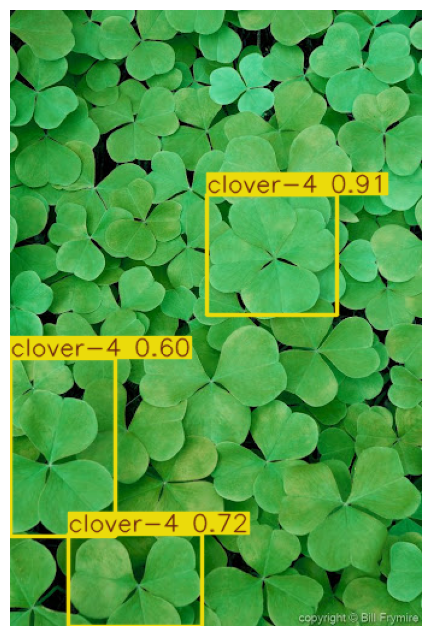

In [4]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2
# Load your downloaded model
model = YOLO('best.pt')


# 2. Upload your test image
uploaded = files.upload()

for img_path in uploaded.keys():
    # 3. Run prediction with "The Cleaning Filters"
    results = model.predict(
        source=img_path,
        conf=0.6,      # High confidence: Ignore anything it's unsure about
        iou=0.4,       # NMS: If boxes overlap by 40%, merge them into one
        agnostic_nms=True,
        classes=[1]
    )

    # 4. Display results

    res_plotted = results[0].plot()
    plt.figure(figsize=(12,8))
    plt.imshow(res_plotted)
    plt.axis('off')
    plt.show()